In [ ]:
"""
Reading and Understanding the Data
Training the model
Residual Analysis
Predicting and evaluating the model on the test set
"""

'\nReading and Understanding the Data\nTraining the model\nResidual Analysis\nPredicting and evaluating the model on the test set\n'

In [22]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print('Uploaded file:', filename)

#Import laibray and unzip file 

In [2]:
# Read the extracted files
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
import seaborn as sns
# Disable DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here

# Enable DeprecationWarning again
warnings.filterwarnings("default", category=DeprecationWarning)

import zipfile
zip_file_path = '/content/archive (5).zip'
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/target_directory/')


#load and read CSV data file

In [3]:
# read the data
data = pd.read_csv('/content/target_directory/hotel_booking.csv')


#Exploratory Data Analysis Ans Data Cleaning

head() is a method in Python's Pandas library that is used to display the top rows of a dataframe. The head() method returns the first n rows of a dataframe, where n is the number of rows specified as an argument (by default, n=5).

In [4]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


tail() is a method in Python's Pandas library that is used to display the bottom rows of a dataframe. The tail() method returns the last n rows of a dataframe, where n is the number of rows specified as an argument (by default, n=5).

In [5]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


There are 30 rows and 2 columns present in the data.

In [6]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(119390, 36)

In [7]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# convert the date column to a datetime column
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# print the dataframe with the converted datetime column
data['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [10]:
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

The describe() function in Python's Pandas library can also accept various parameters to generate specific types of descriptive statistics. When the include parameter is set to "object", the function will generate summary statistics only for the columns containing object data types (e.g. strings).

Here's an example of how to use the describe() function with the include parameter set to "object"

In [11]:
data.describe(include = "object")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [12]:
#find the object clumn and unique value fromobject columns
for col in data.describe(include = "object").columns:
  print(col)
  print(data[col].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [13]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
#drop columne 
#data.drop(["agent","company"], axis = 1, inplace = True)
if set(['agent','company']).issubset(data.columns):
       #This should return True
       pass

#data.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#drom missing or null values from data 

In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [18]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


#plot the model

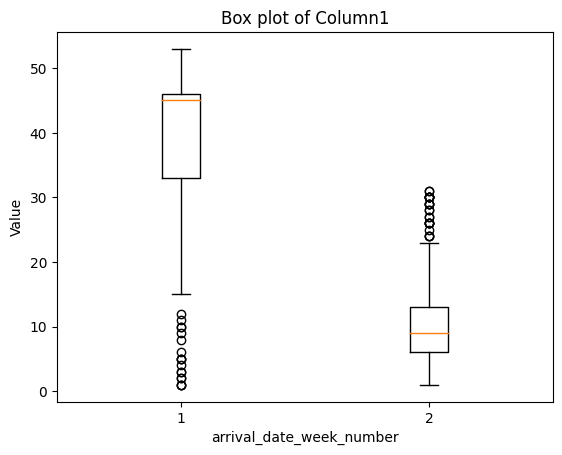

In [19]:
import matplotlib.pyplot as plt
# Create a box plot of Column1
fig, ax = plt.subplots()
ax.boxplot(data[['arrival_date_week_number', 'arrival_date_day_of_month']])

# Set the plot title and axis labels
ax.set_title('Box plot of Column1')
ax.set_xlabel('arrival_date_week_number')
ax.set_ylabel('Value')

# Show the plot
plt.show()

#remove outliers

In [20]:
# Remove rows with z-scores greater than 3
data = data[data['adr'] < 5000]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


In [21]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


#Data Analysis And Data Virtulization

In [22]:
# Calculate the percentage of each value in Column1
percentages_cancellation = data['is_canceled'].value_counts(normalize=True) #* 100

# Print the percentages
print(percentages_cancellation)

0    0.921659
1    0.078341
Name: is_canceled, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


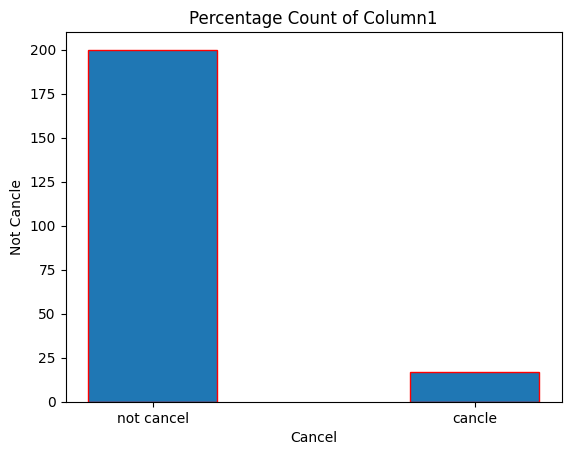

In [23]:

# Plot the percentages as a bar chart
#plt.bar(percentages.index, percentages.values,data['is_canceled'].value_counts(normalize=True))
plt.bar(['not cancel','cancle'],data['is_canceled'].value_counts(),edgecolor='r',width= 0.4)
plt.xlabel('Cancel')
plt.ylabel('Not Cancle')
plt.title('Percentage Count of Column1')
plt.show()

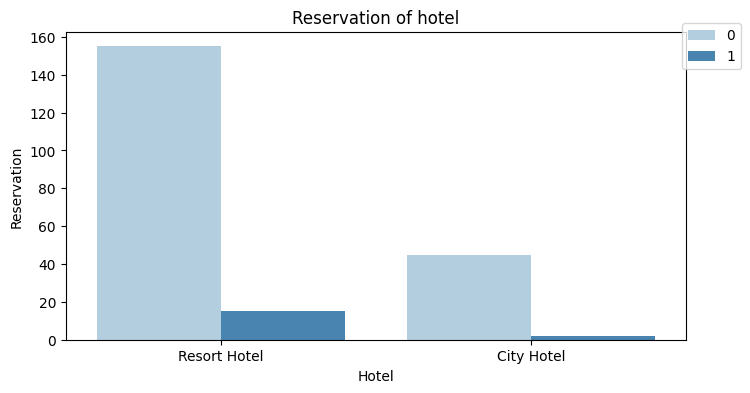

In [24]:
# Create a count plot
#ax1 = sns.countplot(x='hotel', data1=data)
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
#tips = sns.load_dataset("tips")

# Create countplot
plt.figure(figsize=(8,4))
ax = sns.countplot(x="hotel", hue="is_canceled", data=data, palette = "Blues")
legend_labels = ax.get_legend_handles_labels()
#ax.legend(box_to_anchor(1,1))
ax.legend(bbox_to_anchor=(1.1, 1.05))
# Set plot title and labels
plt.title("Reservation of hotel")
plt.xlabel("Hotel")
plt.ylabel("Reservation")

# Show plot
plt.show()

#data['hotel'] = data['hotel']
#import seaborn as sns
#sns.countplot(x ='hotel', hue='is_canceled', df=data)

In [25]:
resourt_hotel = data[data["hotel"] == "Resort Hotel"]
resourt_hotel = data['is_canceled'].value_counts(normalize=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
resourt_hotel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.921659
1    0.078341
Name: is_canceled, dtype: float64

In [27]:
city_hotel = data[data["hotel"] == "City Hotel"]
city_hotel = data['is_canceled'].value_counts(normalize=True)
city_hotel

0    0.921659
1    0.078341
Name: is_canceled, dtype: float64

In [28]:
#if 'reservation_status_date' in data:
 #   data.loc[data['reservation_status_date'].isnull(), 'reservation_status_date'] #= df3['three']
resourt_hotel = resourt_hotel.groupby(['reservation_status_date','adr']).mean()#[['adr']].mean()
resourt_hotel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


adr                        0.078341
reservation_status_date    0.921659
Name: is_canceled, dtype: float64

In [29]:
city_hotel = city_hotel.groupby(['reservation_status_date','adr']).mean()#[['adr']].mean()
city_hotel

adr                        0.078341
reservation_status_date    0.921659
Name: is_canceled, dtype: float64

In [38]:
"""plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resourt_hotel.index,resourt_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel[['adr']], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()"""

"plt.figure(figsize = (20,8))\nplt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)\nplt.plot(resourt_hotel.index,resourt_hotel['adr'], label = 'Resort Hotel')\nplt.plot(city_hotel.index,city_hotel[['adr']], label = 'City Hotel')\nplt.legend(fontsize = 20)\nplt.show()"

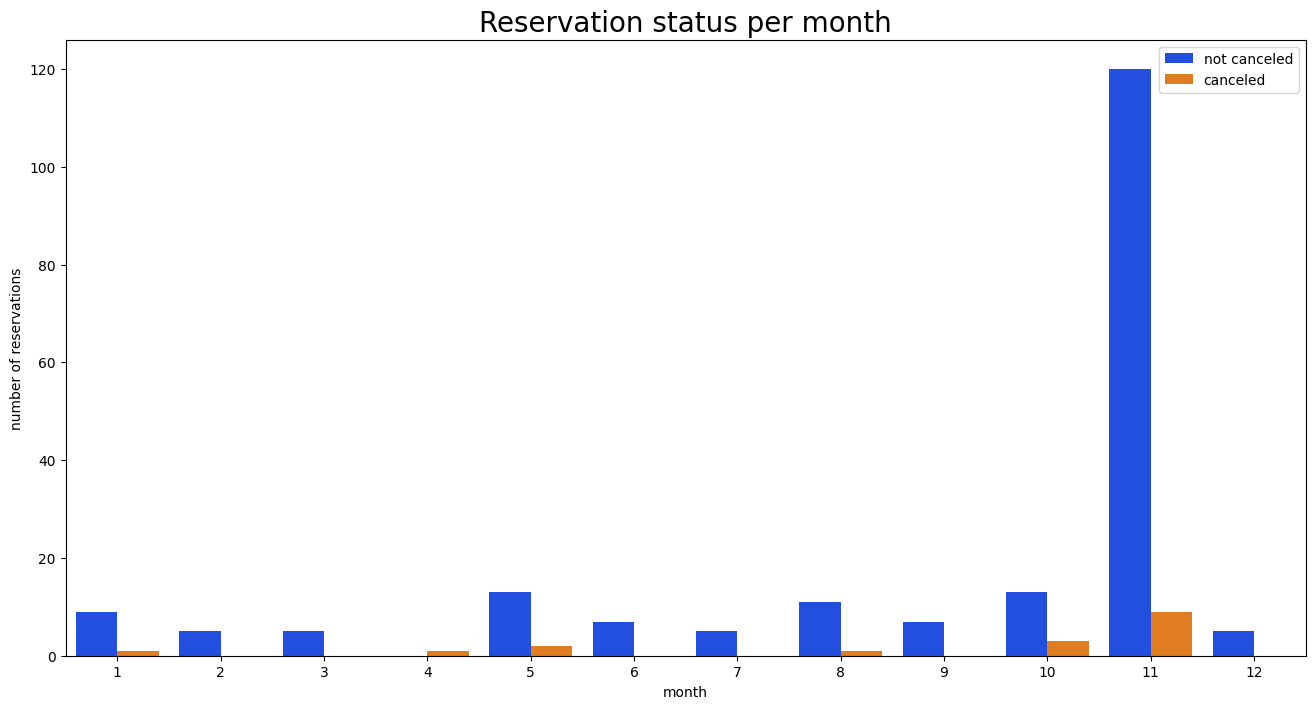

In [45]:
data['month'] =data['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month',hue = 'is_canceled',data = data,palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Reservation status per month',size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


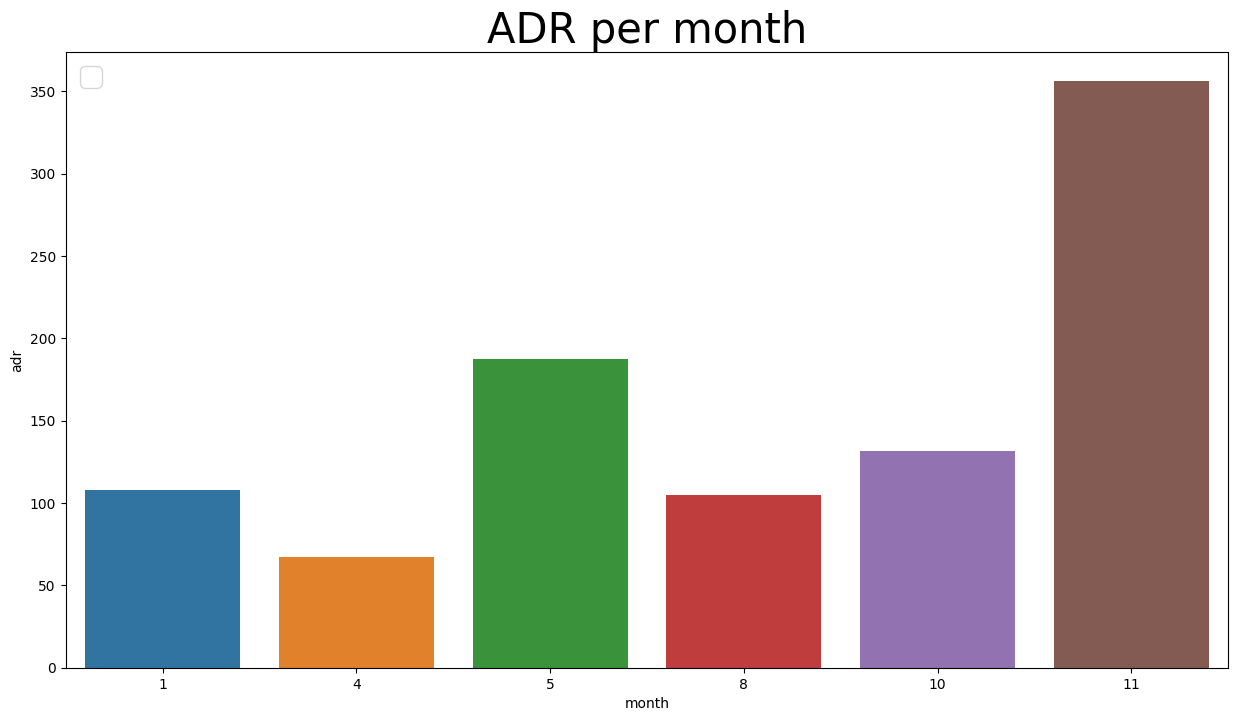

In [46]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()

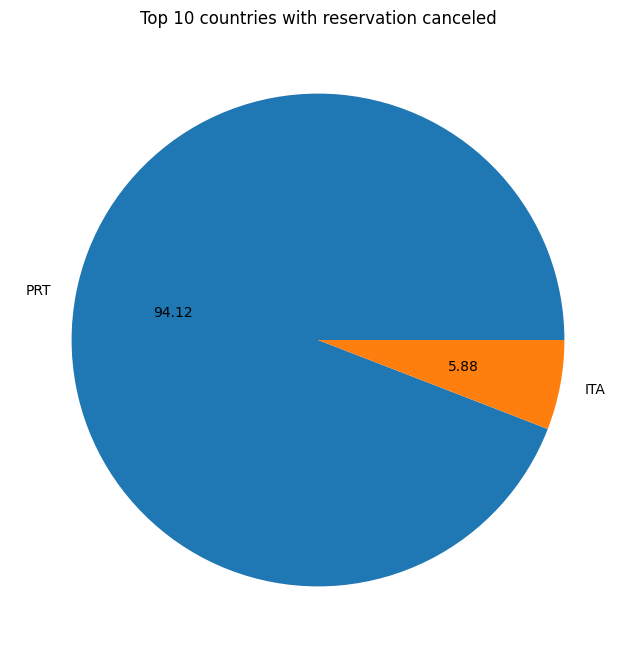

In [47]:
cancelled_data = data[data['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

In [48]:
data['market_segment'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Corporate        131
Online TA         44
Direct            21
Offline TA/TO     18
Complementary      2
Groups             1
Name: market_segment, dtype: int64

In [51]:
data['market_segment'].value_counts(normalize = True)

Corporate        0.603687
Online TA        0.202765
Direct           0.096774
Offline TA/TO    0.082949
Complementary    0.009217
Groups           0.004608
Name: market_segment, dtype: float64

In [52]:
cancelled_data['market_segment'].value_counts(normalize = True)

Corporate        0.764706
Direct           0.117647
Offline TA/TO    0.058824
Online TA        0.058824
Name: market_segment, dtype: float64